In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

### In a competitive market, many a time we observe the customer-behaviour of switching from one provider to another, specially in cases where customers are dissatisfied with the service provided, or when their requirements change. In such cases, churn prediction modeling or the task of identifying customers who are likely to discontinue use of a service, renders extremely useful to the industry.



# Data Gathering

In [2]:
data = pd.read_csv(r'churn_dataset.csv')
data

,CustomerID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v13,v14,v15,v16,v17,v18,v19,v20,v21,Churn
0,C3,P576,Lucknow,Z733,3824.74,0,0.0,0,3824.74,0.0,...,Delivered,CC105,RC29494,RC31,G13167,False,FALSE,FALSE,False,0
1,C4,P580,Jammu,Z514,3824.74,0,0.0,0,3824.74,0.0,...,Delivered,CC105,RC29494,RC31,G13167,False,FALSE,FALSE,False,1
2,C5,P582,Durg,Z2442,3824.74,0,0.0,0,3824.74,0.0,...,Delivered,CC105,RC29494,RC31,G13167,False,FALSE,FALSE,False,0
3,C7,P576,Kolkata,Z4345,3711.86,0,0.0,0,3824.74,0.0,...,Delivered,CC105,RC29494,RC31,G13167,False,FALSE,FALSE,False,0
4,C8,P582,Thane,Z1663,3824.74,0,0.0,0,3824.74,0.0,...,Delivered,CC105,RC29494,RC31,G13167,False,FALSE,FALSE,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29884,C24111,P582,Moga,Z271,3824.74,0,0.0,0,3824.74,0.0,...,Cancelled,CC105,RC29483,RC31,G13167,False,FALSE,FALSE,False,0
29885,C24323,P147,Surat,Z1511,449.70,0,0.0,0,449.70,0.0,...,Delivered,CC1817,RC23424,RC32,G23596,False,FALSE,FALSE,False,0
29886,C26227,P145,Surat,Z1511,519.25,0,0.0,0,519.25,0.0,...,Shipped,CC1711,RC26089,RC32,G26326,False,FALSE,FALSE,False,0
29887,C28695,P148,Hyderabad,Z2549,637.52,0,0.0,0,637.52,0.0,...,Shipped,CC106,RC28375,RC32,G28625,False,FALSE,FALSE,False,0


# Preprocessing

### EDA / Feature Engineering / Feature Selection

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  29889 non-null  object 
 1   v1          29889 non-null  object 
 2   v2          29889 non-null  object 
 3   v3          29889 non-null  object 
 4   v4          29889 non-null  float64
 5   v5          29889 non-null  int64  
 6   v6          29889 non-null  float64
 7   v7          29889 non-null  int64  
 8   v8          29889 non-null  float64
 9   v9          29889 non-null  float64
 10  v10         29889 non-null  float64
 11  v11         29889 non-null  float64
 12  v12         29889 non-null  float64
 13  v13         29889 non-null  object 
 14  v14         29889 non-null  object 
 15  v15         29889 non-null  object 
 16  v16         29889 non-null  object 
 17  v17         29889 non-null  object 
 18  v18         29889 non-null  bool   
 19  v19         29889 non-nul

In [4]:
#Categorical Features
cat_features=data.select_dtypes(include='object').columns
print("Categorical Features:\n",cat_features,"\n No of categorical features:",len(cat_features))

#Numerical Features
num_features=data.select_dtypes(exclude='object').columns
print("Numerical Features:\n",num_features,"\n No of numerical features:",len(num_features))

Categorical Features:
 Index(['CustomerID', 'v1', 'v2', 'v3', 'v13', 'v14', 'v15', 'v16', 'v17',
       'v19', 'v20'],
      dtype='object') 
 No of categorical features: 11
Numerical Features:
 Index(['v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v18', 'v21',
       'Churn'],
      dtype='object') 
 No of numerical features: 12


In [5]:
# Statistical Value counts for Categorical Features
for feature in cat_features:
    print(f"{feature}")
    print("****")
    print(data[feature].value_counts())
    print("#########################################################################")
    print("\n\n")

CustomerID
****
C14904    1
C11097    1
C9461     1
C9762     1
C2549     1
         ..
C6262     1
C28557    1
C11163    1
C5961     1
C14525    1
Name: CustomerID, Length: 29889, dtype: int64
#########################################################################



v1
****
P576    8443
P582    8319
P580    5572
P152    1088
P148    1009
        ... 
P620       1
P99        1
P76        1
P607       1
P96        1
Name: v1, Length: 65, dtype: int64
#########################################################################



v2
****
Bangalore                            1995
New Delhi                            1621
Pune                                 1369
Mumbai                               1290
Hyderabad                            1250
                                     ... 
neyveli                                 1
HINDUPUR                                1
['Jorhat' 'Mumbai' 'Narsinghpur']       1
['SANGAMNER' 'Sangamner']               1
orai                                  

In [6]:
## Total 11 Features droped for below reasons:-
# CustomerID feature contains all unique records
# [v5,v7] feature contains All values as [0]
# v6 feature contains 88.9% values as [0] 
# v9 feature contains 99.7% values as [0]
# v12 feature contains 99.8% values as [0]
# v15 feature contains 12022 unique values
# v16 feature contains 27192 same values of RC32
# v17 feature contains 24742 unique values which is 82.8%
# [v18,v19,v20,v21] feature contains all values as False


data.drop(['CustomerID','v5',"v6",'v7',"v9","v12",'v15','v16',"v17",'v18','v19','v20','v21'],axis = 1,inplace = True)

In [7]:
data

,v1,v2,v3,v4,v8,v10,v11,v13,v14,Churn
0,P576,Lucknow,Z733,3824.74,3824.74,0.0,0.0,Delivered,CC105,0
1,P580,Jammu,Z514,3824.74,3824.74,0.0,0.0,Delivered,CC105,1
2,P582,Durg,Z2442,3824.74,3824.74,0.0,0.0,Delivered,CC105,0
3,P576,Kolkata,Z4345,3711.86,3824.74,0.0,0.0,Delivered,CC105,0
4,P582,Thane,Z1663,3824.74,3824.74,0.0,0.0,Delivered,CC105,1
...,...,...,...,...,...,...,...,...,...,...
29884,P582,Moga,Z271,3824.74,3824.74,1.0,0.0,Cancelled,CC105,0
29885,P147,Surat,Z1511,449.70,449.70,4.0,9.0,Delivered,CC1817,0
29886,P145,Surat,Z1511,519.25,519.25,3.0,9.0,Shipped,CC1711,0
29887,P148,Hyderabad,Z2549,637.52,637.52,3.0,9.0,Shipped,CC106,0


# Encoding

In [8]:
# Label Encoding used on v1 feature
le = LabelEncoder()
le.fit(data.v1)
data.v1 = pd.DataFrame(le.transform(data.v1))
print(data.v1.nunique())

65


In [9]:
# Label Encoding used on v2 feature
le = LabelEncoder()
le.fit(data.v2)
data.v2 = pd.DataFrame(le.transform(data.v2))
print(data.v2.nunique())

2155


In [10]:
# Label Encoding used on v3 feature
le = LabelEncoder()
le.fit(data.v3)
data.v3 = pd.DataFrame(le.transform(data.v3))
print(data.v3.nunique())

5566


In [11]:
# Label Encoding used on v13 feature
le = LabelEncoder()
le.fit(data.v13)
data.v13 = pd.DataFrame(le.transform(data.v13))
print(data.v13.nunique())

14


In [12]:
# Label Encoding used on v14 feature
le = LabelEncoder()
le.fit(data.v14)
data.v14 = pd.DataFrame(le.transform(data.v14))
print(data.v14.nunique())

255


In [13]:
data

,v1,v2,v3,v4,v8,v10,v11,v13,v14,Churn
0,25,834,5025,3824.74,3824.74,0.0,0.0,2,7,0
1,27,639,4484,3824.74,3824.74,0.0,0.0,2,7,1
2,29,391,1559,3824.74,3824.74,0.0,0.0,2,7,0
3,25,790,3628,3711.86,3824.74,0.0,0.0,2,7,0
4,29,1365,721,3824.74,3824.74,0.0,0.0,2,7,1
...,...,...,...,...,...,...,...,...,...,...
29884,29,919,1847,3824.74,3824.74,1.0,0.0,0,7,0
29885,3,1334,556,449.70,449.70,4.0,9.0,2,127,0
29886,1,1334,556,519.25,519.25,3.0,9.0,3,58,0
29887,4,578,1673,637.52,637.52,3.0,9.0,3,8,0


In [14]:
data.info() # checked all features are of Numeric Datatype as our model can be on numeric dtype only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      29889 non-null  int32  
 1   v2      29889 non-null  int32  
 2   v3      29889 non-null  int32  
 3   v4      29889 non-null  float64
 4   v8      29889 non-null  float64
 5   v10     29889 non-null  float64
 6   v11     29889 non-null  float64
 7   v13     29889 non-null  int32  
 8   v14     29889 non-null  int32  
 9   Churn   29889 non-null  int64  
dtypes: float64(4), int32(5), int64(1)
memory usage: 1.7 MB


In [15]:
# function created for visualization of data distribution


def plotvariable(df,variable):
    plt.figure(figsize = (16,4))
    
    # histogram
    plt.subplot(1,3,1)
    plt.hist(df[variable],alpha = 0.5,color="g")
    
    # boxplot
    plt.subplot(1,3,2)
    sns.boxplot(df[variable],color="y")
    
    # distribution plot
    plt.subplot(1,3,3)
    sns.distplot(df[variable],color="r")

    plt.show

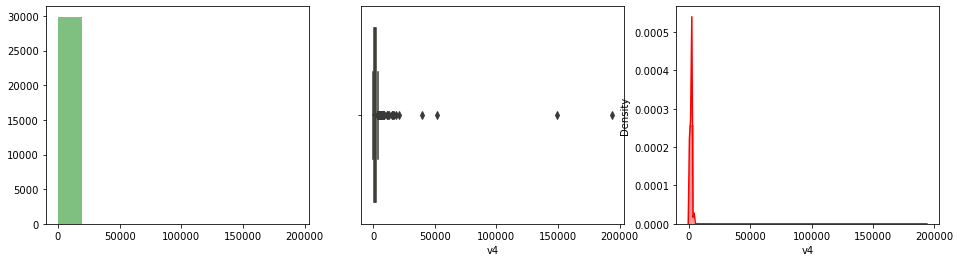

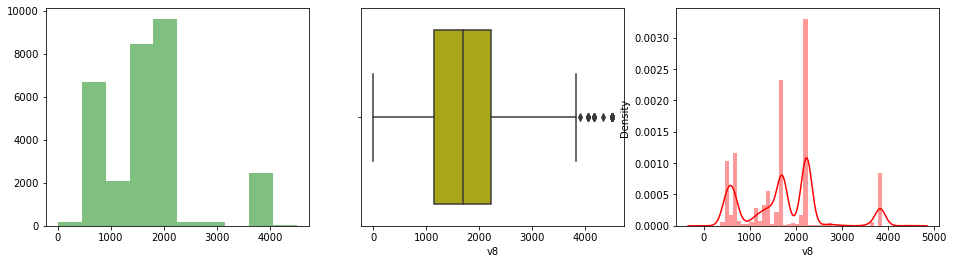

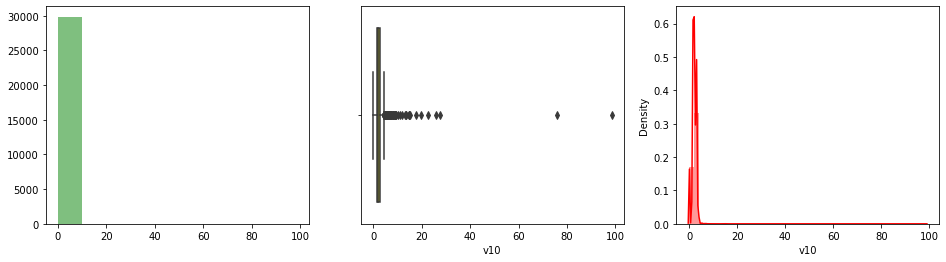

In [16]:
column_list = ['v4','v8','v10']
for column in column_list:
    plotvariable(data,column)

In [17]:
data.v4 = np.log(data.v4+ 0.001)

data.v10 = np.log(data.v10+ 0.01)


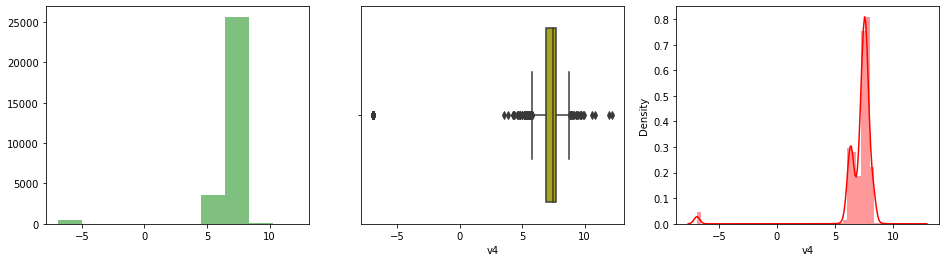

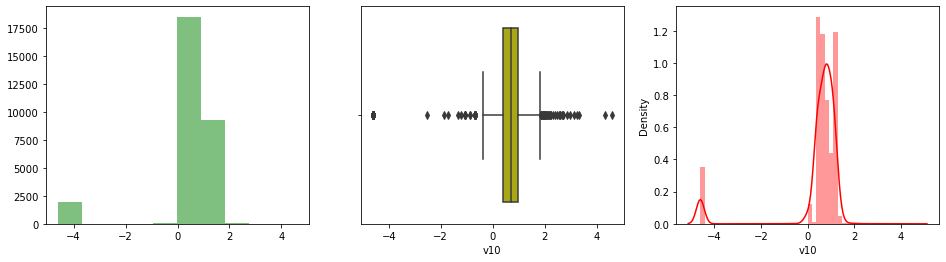

In [18]:
column_list = ['v4','v10']
for column in column_list:
    plotvariable(data,column)

## Correlation matrix

<AxesSubplot:>

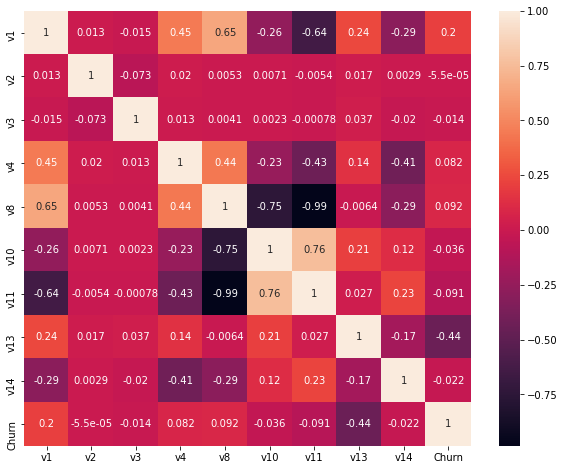

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True)

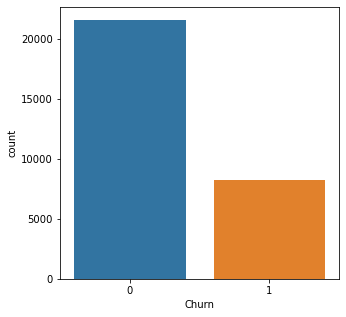

<AxesSubplot:ylabel='Churn'>

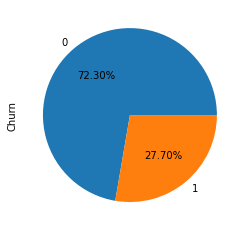

In [20]:
# Count plot for Target Variable(Churn)
plt.figure(figsize=(5,5))
sns.countplot(data['Churn'])
plt.show()
data['Churn'].value_counts().plot(kind='pie',autopct="%1.2f%%")
#Conclusion: Dataset is unbalanced as the 72.30% belongs to class 0 and 27.70% belongs to class 1

In [21]:
# Used SMOTE technique to Balance the Data

from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [22]:
x = data.drop('Churn',axis = 1)
y = data['Churn']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1,stratify=y)

sm = SMOTE(random_state=10)

x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)


<AxesSubplot:>

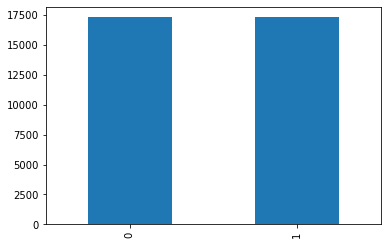

In [24]:
y_train_smote.value_counts().plot(kind='bar') # Balanced data with SMOTE

# Model Building & Evaluations

## Logistic Regression

In [25]:
log = LogisticRegression()
log.fit(x_train_smote,y_train_smote)
y_pred = log.predict(x_test)

In [26]:
cf_metrics_lr = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_lr}")
print("\n#########################\n")
clf_report_lr = classification_report(y_pred,y_test)
print(f"Classification Report\n{clf_report_lr}")
print("\n#########################\n")
print(f'Train accuracy: {log.score(x_train,y_train)}')
print(f'Test accuracy: {log.score(x_test,y_test)}')

Confusion Metrics
[[3207  225]
 [1115 1431]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.93      0.83      3432
           1       0.86      0.56      0.68      2546

    accuracy                           0.78      5978
   macro avg       0.80      0.75      0.75      5978
weighted avg       0.79      0.78      0.76      5978


#########################

Train accuracy: 0.7801848521600937
Test accuracy: 0.7758447641351622


## KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_smote,y_train_smote)
y_pred = knn.predict(x_test)

In [28]:
cf_metrics_knn = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_knn}")
print("\n#########################\n")

clf_report_knn = classification_report(y_pred,y_test)

print(f"Classification Report\n{clf_report_knn}")
print("\n#########################\n")

print(f'Train accuracy: {knn.score(x_train,y_train)}')
print(f'Test accuracy: {knn.score(x_test,y_test)}')

Confusion Metrics
[[3158  614]
 [1164 1042]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      3772
           1       0.63      0.47      0.54      2206

    accuracy                           0.70      5978
   macro avg       0.68      0.65      0.66      5978
weighted avg       0.69      0.70      0.69      5978


#########################

Train accuracy: 0.8137677219689683
Test accuracy: 0.702576112412178


### With MinMaxScaler

In [29]:
normal_scaler = MinMaxScaler()
x1_scaled = normal_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x1_scaled,columns= x.columns)
x_scaled

,v1,v2,v3,v4,v8,v10,v11,v13,v14
0,0.390625,0.387187,0.902965,0.794341,0.849999,0.000000,0.0,0.153846,0.027559
1,0.421875,0.296657,0.805750,0.794341,0.849999,0.000000,0.0,0.153846,0.027559
2,0.453125,0.181523,0.280144,0.794341,0.849999,0.000000,0.0,0.153846,0.027559
3,0.390625,0.366760,0.651932,0.792771,0.849999,0.000000,0.0,0.153846,0.027559
4,0.453125,0.633705,0.129560,0.794341,0.849999,0.000000,0.0,0.153846,0.027559
...,...,...,...,...,...,...,...,...,...
29884,0.453125,0.426648,0.331896,0.794341,0.849999,0.501898,0.0,0.000000,0.027559
29885,0.046875,0.619313,0.099910,0.682154,0.099940,0.651849,1.0,0.153846,0.500000
29886,0.015625,0.619313,0.099910,0.689691,0.115397,0.620653,1.0,0.230769,0.228346
29887,0.062500,0.268338,0.300629,0.700445,0.141681,0.620653,1.0,0.230769,0.031496


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=1,stratify=y)

sm = SMOTE(random_state=10)

x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)


In [31]:
knn_mm_scaled = KNeighborsClassifier(n_neighbors=5)
knn_mm_scaled.fit(x_train_smote,y_train_smote)
y_pred = knn_mm_scaled.predict(x_test)

In [32]:
cf_metrics_knn_mm_scaled = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_knn_mm_scaled}")
print("\n#########################\n")

clf_report_knn_mm_scaled = classification_report(y_pred,y_test)

print(f"Classification Report\n{clf_report_knn_mm_scaled}")
print("\n#########################\n")

print(f'Train accuracy: {knn_mm_scaled.score(x_train,y_train)}')
print(f'Test accuracy: {knn_mm_scaled.score(x_test,y_test)}')

Confusion Metrics
[[3447  310]
 [ 875 1346]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3757
           1       0.81      0.61      0.69      2221

    accuracy                           0.80      5978
   macro avg       0.81      0.76      0.77      5978
weighted avg       0.80      0.80      0.79      5978


#########################

Train accuracy: 0.8600225837480657
Test accuracy: 0.8017731682837069


## Decision Tree

In [33]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train_smote,y_train_smote)
y_pred = dt.predict(x_test)

In [34]:
cf_metrics_dt = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_dt}")
print("\n#########################\n")

clf_report_dt = classification_report(y_pred,y_test)

print(f"Classification Report\n{clf_report_dt}")
print("\n#########################\n")

print(f'Train accuracy: {dt.score(x_train,y_train)}')
print(f'Test accuracy: {dt.score(x_test,y_test)}')

Confusion Metrics
[[3685  599]
 [ 637 1057]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4284
           1       0.64      0.62      0.63      1694

    accuracy                           0.79      5978
   macro avg       0.75      0.74      0.74      5978
weighted avg       0.79      0.79      0.79      5978


#########################

Train accuracy: 0.9870770774957133
Test accuracy: 0.7932418869187019


## Hyperparameter Tunning

### RandomizedSearchCV

In [35]:
hyperparameters = { "criterion" : ['gini','entropy'],
                    "max_depth" : np.arange(2,10),
                    "min_samples_split" : np.arange(2,20),  # branch node
                    "min_samples_leaf": np.arange(1,15)}    # Leaf node

dt_rscv = RandomizedSearchCV(dt,hyperparameters,cv = 5)
dt_rscv.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [36]:
dt_rscv.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_depth': 9,
 'criterion': 'entropy'}

In [37]:
dt_model_rscv = DecisionTreeClassifier(random_state =1,
                              criterion =  'entropy',
                             max_depth =  9,
                             min_samples_leaf = 13,
                             min_samples_split = 8)
dt_model_rscv.fit(x_train_smote, y_train_smote)
y_pred = dt_model_rscv.predict(x_test)

In [38]:
cf_metrics_dt_rscv = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_dt_rscv}")
print("\n#########################\n")

clf_report_dt_rscv = classification_report(y_pred,y_test)

print(f"Classification Report\n{clf_report_dt_rscv}")
print("\n#########################\n")

print(f'Train accuracy: {dt_model_rscv.score(x_train,y_train)}')
print(f'Test accuracy: {dt_model_rscv.score(x_test,y_test)}')

Confusion Metrics
[[3374  157]
 [ 948 1499]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      3531
           1       0.91      0.61      0.73      2447

    accuracy                           0.82      5978
   macro avg       0.84      0.78      0.79      5978
weighted avg       0.83      0.82      0.81      5978


#########################

Train accuracy: 0.8259378528710636
Test accuracy: 0.8151555704248913


## Randomforest 

In [39]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train_smote, y_train_smote)
y_pred = rf.predict(x_test)

In [40]:
cf_metrics_rf = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_rf}")
print("\n#########################\n")

clf_report_rf = classification_report(y_pred,y_test)

print(f"Classification Report\n{clf_report_rf}")
print("\n#########################\n")

print(f'Train accuracy: {rf.score(x_train,y_train)}')
print(f'Test accuracy: {rf.score(x_test,y_test)}')

Confusion Metrics
[[3730  461]
 [ 592 1195]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4191
           1       0.72      0.67      0.69      1787

    accuracy                           0.82      5978
   macro avg       0.79      0.78      0.79      5978
weighted avg       0.82      0.82      0.82      5978


#########################

Train accuracy: 0.9869516122286813
Test accuracy: 0.8238541318166611


## With Hyperparameter Tuning

### RandomizedSearchCV

In [41]:
hyperparameters = { "criterion" : ['gini','entropy'],
                    "max_depth" : np.arange(2,10),
                    "min_samples_split" : np.arange(2,20),  # branch node
                    "min_samples_leaf": np.arange(1,15),    # Leaf node
                  "max_features":['auto', "sqrt", "log2"],
                  "n_estimators": [20, 65, 110, 155, 200]}    

rf_rscv = RandomizedSearchCV(rf,hyperparameters,cv = 5)
rf_rscv.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [42]:
rf_rscv.best_params_

{'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy'}

In [43]:
rf_rscv = RandomForestClassifier(random_state =1,
                                 n_estimators = 20,
                              criterion =  'entropy',
                                 max_features ="log2",
                             max_depth =  9,
                             min_samples_leaf = 6,
                             min_samples_split = 5)
rf_rscv.fit(x_train_smote, y_train_smote)
y_pred = rf_rscv.predict(x_test)

In [44]:
cf_metrics_rf_rscv = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_rf_rscv}")
print("\n#########################\n")

clf_report_rf_rscv = classification_report(y_pred,y_test)

print(f"Classification Report\n{clf_report_rf_rscv}")
print("\n#########################\n")

print(f'Train accuracy: {rf_rscv.score(x_train,y_train)}')
print(f'Test accuracy: {rf_rscv.score(x_test,y_test)}')

Confusion Metrics
[[3424  151]
 [ 898 1505]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3575
           1       0.91      0.63      0.74      2403

    accuracy                           0.82      5978
   macro avg       0.85      0.79      0.80      5978
weighted avg       0.84      0.82      0.82      5978


#########################

Train accuracy: 0.8355986784325206
Test accuracy: 0.8245232519237203


## Adaboost

In [45]:
adb =AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=100)
adb.fit(x_train_smote,y_train_smote)
y_pred=adb.predict(x_test)

In [46]:
cf_metrics_ab = confusion_matrix(y_pred,y_test)

print(f"Confusion Metrics\n{cf_metrics_ab}")
print("\n#########################\n")

clf_report_ab = classification_report(y_pred,y_test)

print(f"Classification Report\n{clf_report_ab}")
print("\n#########################\n")

print(f'Train accuracy: {adb.score(x_train,y_train)}')
print(f'Test accuracy: {adb.score(x_test,y_test)}')

Confusion Metrics
[[3607  368]
 [ 715 1288]]

#########################

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3975
           1       0.78      0.64      0.70      2003

    accuracy                           0.82      5978
   macro avg       0.81      0.78      0.79      5978
weighted avg       0.82      0.82      0.81      5978


#########################

Train accuracy: 0.9011751913345323
Test accuracy: 0.818835731013717


# Result

In [47]:
dictionary = {'Algorithm':['Logistic','KNN','DT','RF','ADB'],
              'Train Accuracy':[0.7801,0.8600,0.8259,0.8355,0.9019],
              'Test Accuracy':[0.7801,0.8017,0.8151,0.8245,0.8124]}
             
summary = pd.DataFrame(dictionary,index = ['Model 1','Model 2','Model 3','Model 4','Model 5'])
summary.T

,Model 1,Model 2,Model 3,Model 4,Model 5
Algorithm,Logistic,KNN,DT,RF,ADB
Train Accuracy,0.7801,0.86,0.8259,0.8355,0.9019
Test Accuracy,0.7801,0.8017,0.8151,0.8245,0.8124
